In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("Fraud-Detection.xlsx")
df.head()#The column names were printed as if they were first index, second row.
#They were represented as values. Also, the fraud detection dataset explanation is useless.

,Fraud Detection Dataset : This dataset consists of transactions made by credit card or debit card between 2012 and 2020 February,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID,Month,**YEAR,Transaction_Type,Merchant_Category,Transaction_Amount,Card_Type,Location,Distance,has the transaction been approved?,What is the age of the user?,Account_Balance,*FRAUD
2,1,Jan,2012,Online Purchase,Electronics,1200,Credit,New York,5,Approved,32,3000,No
3,2,Feb,2012,ATM Withdrawal,Groceries,350,Debit,Los Angeles,10,Declined,45,1500,No
4,3,Mar,2012,Online Purchase,Books,75,Credit,San Francisco,15,Approved,28,500,No


**1-COLUMNS NAME REPRESENTED AS VARIABLES**

In [3]:
df = pd.read_excel('Fraud-Detection.xlsx', header=2)#To remove the unnecessary explanation and nan values at the 0.index, header=2 function was used. To use the third row in the Excel file as column names, the first two rows should be skipped.
df.head()

,ID,Month,**YEAR,Transaction_Type,Merchant_Category,Transaction_Amount,Card_Type,Location,Distance,has the transaction been approved?,What is the age of the user?,Account_Balance,*FRAUD
0,1,Jan,2012,Online Purchase,Electronics,1200.0,Credit,New York,5.0,Approved,32.0,3000.0,No
1,2,Feb,2012,ATM Withdrawal,Groceries,350.0,Debit,Los Angeles,10.0,Declined,45.0,1500.0,No
2,3,Mar,2012,Online Purchase,Books,75.0,Credit,San Francisco,15.0,Approved,28.0,500.0,No
3,4,Apr,2012,POS Payment,Clothing,50.0,credit,Chicago,2.0,Approved,36.0,2000.0,Yes
4,5,May,2012,Online Purchase,Electronics,900.0,Credit,New York,7.0,Approved,40.0,2500.0,No


In [4]:
df.tail()

,ID,Month,**YEAR,Transaction_Type,Merchant_Category,Transaction_Amount,Card_Type,Location,Distance,has the transaction been approved?,What is the age of the user?,Account_Balance,*FRAUD
94,94,Oct,2019,POS Payment,Groceries,310.0,Debit,Los Angeles,10.0,Approved,47.0,2000.0,no
95,95,Nov,2019,Online Purchase,Clothing,70.0,Credit,Chicago,4.0,Approved,31.0,1100.0,no
96,96,Dec,2019,ATM Withdrawal,Books,40.0,Credit,San Francisco,17.0,Declined,23.0,500.0,No
97,97,Jan,2020,POS Payment,Electronics,910.0,Credit,New York,5.0,Approved,32.0,2400.0,No
98,98,Feb,2020,Online Purchase,Groceries,230.0,Debit,Los Angeles,11.0,Approved,22.0,700.0,No


In [5]:
for columnName in df:
  print(columnName, df[columnName].dtype)
#By checking the output, type of the ID , **YEAR, Transaction Amoount,Distance must be integer.
#Month's,Transaction type's,Merchant Category's,Card Type's, Location's,Approval of Transaction's and Fraud's types should be string.

ID int64
Month object
**YEAR int64
Transaction_Type object
Merchant_Category object
Transaction_Amount float64
Card_Type object
Location object
Distance float64
has the transaction been approved? object
What is the age of the user?  float64
Account_Balance float64
*FRAUD object


In [6]:
new_column_names = {'**YEAR': 'Year',
                    'Transaction_Type': 'Transaction Type',
                    'Merchant_Category': 'Merchant Category',
                    'Transaction_Amount': 'Transaction Amount',
                    'Card_Type': 'Card Type',
                    'has the transaction been approved?': 'Approvation',
                    'What is the age of the user? ': "User's Age",
                    'Account_Balance': 'Account Balance',
                    '*FRAUD': 'Fraud'
                    }
df.rename(columns=new_column_names, inplace=True)
print(df)

    ID Month  Year Transaction Type Merchant Category  Transaction Amount  \
0    1   Jan  2012  Online Purchase       Electronics              1200.0   
1    2   Feb  2012   ATM Withdrawal         Groceries               350.0   
2    3   Mar  2012  Online Purchase             Books                75.0   
3    4   Apr  2012      POS Payment          Clothing                50.0   
4    5   May  2012  Online Purchase       Electronics               900.0   
..  ..   ...   ...              ...               ...                 ...   
94  94   Oct  2019      POS Payment         Groceries               310.0   
95  95   Nov  2019  Online Purchase          Clothing                70.0   
96  96   Dec  2019   ATM Withdrawal             Books                40.0   
97  97   Jan  2020      POS Payment       Electronics               910.0   
98  98   Feb  2020  Online Purchase         Groceries               230.0   

   Card Type         Location  Distance Approvation  User's Age  \
0     Cr

**2-ID COLUMN (WHETHER IT CONTAINS DUPLICATED VALUES,THE VALUES MUST BE UNIQUE)**

In [7]:
print(df["ID"].is_unique)#The output is false, some values are duplicated.

False


In [8]:
print(df["ID"].isnull().sum())#No missing values.

0


In [9]:
df.loc[df.duplicated()]#Duplicaed values can be checked by the pandas.

,ID,Month,Year,Transaction Type,Merchant Category,Transaction Amount,Card Type,Location,Distance,Approvation,User's Age,Account Balance,Fraud
60,60,Dec,2016,ATM Withdrawal,Books,32.0,Credit,San Francisco,16.0,Approved,31.0,1600.0,Yes


In [10]:
df.drop_duplicates()#Duplicated rows are dropped.
#df.drop_duplicates(inplace=True) To drop the duplicates permanently.
df.drop_duplicates(inplace=True, ignore_index=True)#To drop the duplicates permanently. ignore=index=True is used to start all the indexes from 0.
#Otherwise, index 60 is removed but it stays as empty row.

In [11]:
#df.loc[60,"ID"] by this code, we can check the index 60, because we had removed the index 60, there emerged a gap between indexes, as : 59, 61.
len(df["ID"])#the new length must be 98, not 99.


98

**3-MONTH COLUMN AND CHECKING THE CONSTRAINTS**

In [12]:
df["Month"].isnull().sum()

0

In [13]:
months = df["Month"].str.extract(r'\b(\w{3})\b', expand=False)
df["Month"]=months
months=months.astype(str)#The type of the column still remains as object. Therefore, the array can be formed by using Numpy.
print(months.unique())#It will help to check which values are found by printing the unique values in months. It can be seen whether these values are compatible with the expected ones.
print(months.dtype)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
object


**4-YEAR COLUMN**

In [14]:
df["Year"]=df["Year"].astype(str)#To detect the extra digits, len() function can be used. Firstly, **YEAR column must be turned to string type.
for row in df["Year"]:
  if len(row)==4:
    continue
  else:
    invalidYear=row
    print(row)
df["Year"]=df["Year"].astype(int)#Column's type is returned to integer to find the indexof the invalidYear.

20125


In [15]:
#df.loc[36,"Year"]
invalidYear_index = df[df['Year'] == 20125].index
print(invalidYear_index)

Int64Index([36], dtype='int64')


In [16]:
df.loc[invalidYear_index, "Year"] = 2015#After receiving the location of the invalidYear, we redefine the value.It is replaced.
print(df.loc[invalidYear_index,"Year"])

36    2015
Name: Year, dtype: int64


In [17]:
df['Year'].replace('20125', "2015", inplace=True)#To make this change permanently, inplace=True must be applied to dataFrame.
#print(df["Year"])
print(df.loc[invalidYear_index,"Year"])

36    2015
Name: Year, dtype: int64


**5-TRANSACTION TYPE**

In [18]:
df["Transaction Type"].isnull().sum()

0

In [19]:
df["Transaction Type"].dtype #The output returns object type.


dtype('O')

In [20]:
print(df["Transaction Type"].value_counts())#The names and numbers of the values can be seen.
#Value names with the same meaning but spelling errors may appear.

Online Purchase    33
POS Payment        33
ATM Withdrawal     32
Name: Transaction Type, dtype: int64


In [21]:
len(df["Transaction Type"])#It can be checked whether the total matches the total value of the dataset.

98

**6-MERCHANT CATEGORY**

In [22]:
df["Merchant Category"].isnull().sum()
print(df["Merchant Category"].dtype)

object


In [23]:
print(df["Merchant Category"].value_counts())#Value names seem correct. Also, the sum of the values is consistent with the sample size.

Electronics    25
Groceries      25
Books          24
Clothing       24
Name: Merchant Category, dtype: int64


**7-TRANSACTION AMOUNT**

In [24]:
df["Transaction Amount"].isnull().sum()

1

In [25]:
#NA value can be imputted with the mean.
mean=df["Transaction Amount"].mean()
print(mean)

319.8041237113402


In [26]:
nan_index = df[df['Transaction Amount'].isna()].index
print("NaN Index:", nan_index)

NaN Index: Int64Index([14], dtype='int64')


In [27]:
df["Transaction Amount"].fillna(mean,inplace=True)
print(df.loc[14,"Transaction Amount"])#The mean value is inserted.
#It would be logical to round the number 319.8041237113402 to 320, because all values are in the integer form,not float.


319.8041237113402


In [28]:
df.loc[14,"Transaction Amount"]=320
df['Transaction Amount'] = df['Transaction Amount'].astype(np.int64)
print(df.loc[14,"Transaction Amount"])
print(df["Transaction Amount"].dtype)


320
int64


In [29]:
#amount_array = df['Transaction_Amount'].values
#q1 = np.percentile(amount_array, 0.25)
#q3 = np.percentile(amount_array, 0.75)
#iqr = q3 - q1
#upper_bound = q3+1.5*iqr
#lower_bound = q1-1.5*iqr
#amount_array[np.logical_or(amount_array < lower_bound , amount_array > upper_bound)]
#outliers = (amount_array < lower_bound) | (amount_array > upper_bound)
#print(df[outliers])

In [30]:
melted_df = pd.melt(df, value_vars=['Transaction Amount'], var_name='Variable', value_name='Value')
Q1 = np.percentile(melted_df['Value'], 25)
Q3 = np.percentile(melted_df['Value'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (melted_df['Value'] < lower_bound) | (melted_df['Value'] > upper_bound)
print(melted_df[outliers])
#The output indicates empty dataframe,  which means no outlier.

Empty DataFrame
Columns: [Variable, Value]
Index: []


In [31]:
std_deviation = df['Transaction Amount'].std()
print(std_deviation)

351.37349524118275


In [32]:
mean_value = df['Transaction Amount'].mean()
print(mean_value)

319.8061224489796


In [33]:
median_value = df['Transaction Amount'].median()
print(median_value)

190.0


In [34]:
mode_value = df['Transaction Amount'].mode()
print(mode_value)

0    50
Name: Transaction Amount, dtype: int64


**8-CARD TYPE**

In [35]:
melted_df = df.melt(value_vars=['Card Type'], var_name='Card_Type', value_name='Card_Type_Value')
print(melted_df)

    Card_Type Card_Type_Value
0   Card Type          Credit
1   Card Type           Debit
2   Card Type          Credit
3   Card Type          credit
4   Card Type          Credit
..        ...             ...
93  Card Type           Debit
94  Card Type          Credit
95  Card Type          Credit
96  Card Type          Credit
97  Card Type           Debit

[98 rows x 2 columns]


In [36]:
df['Card Type'].unique()#It can be seen that  upper/lower case versions of the words lead to corruption while forming pivot table.

array(['Credit', 'Debit', 'credit', 'debit'], dtype=object)

In [37]:
#df['Card_Type'] = df['Card_Type'].str.upper()
#df['Card_Type'] = np.where(df['Card_Type'].isin(['CREDIT', 'DEBIT']), df['Card_Type'], np.nan)
#print(df["Card_Type"].value_counts())

In [38]:
cardTypeDebit = df["Card Type"].str.contains("debit", case=False)
cardTypeCredit = df["Card Type"].str.contains("credit", case=False)
df["Card Type"] = np.where(cardTypeDebit, "DEBIT", np.where(cardTypeCredit, "CREDIT", df["Card Type"]))

print(df["Card Type"].value_counts())

CREDIT    73
DEBIT     25
Name: Card Type, dtype: int64


In [39]:
df["Card Type"].head()

0    CREDIT
1     DEBIT
2    CREDIT
3    CREDIT
4    CREDIT
Name: Card Type, dtype: object

8-LOCATIONS(VALUES CONTAIN WHHITE SPACES AND QUOTATION MARKS)

In [40]:
df["Location"].isnull().sum()

0

In [41]:
print(df["Location"].value_counts())#Beside the white spaces and unnecessary marks,there is NA value that is not detected by Pandas.

Los Angeles         25
New York            24
Chicago             23
 San Francisco      21
"San Francisco"      2
NewYork              1
"Chicago"            1
NA                   1
Name: Location, dtype: int64


In [42]:
missing_values=["n/a","NA","na","-"]
#df=pd.read_excel("Fraud-Detection.xlsx",na_values=missing_values) na_values=missing_values is applied all columns in the DataFrame,not spesific columns.
df["Location"] = df["Location"].replace(missing_values, pd.NA)
df["Location"].isnull().sum()


0

In [43]:
mode=df["Location"].mode()[0]#We can imput the mode to the na value.
print(mode)#.Actually the mode doesn't make sense because all frequencies of the location are almost equal.
df["Location"].fillna(mode,inplace=True)


Los Angeles


In [44]:
df['Location'] = df['Location'].str.replace('["]', '').str.strip().str.upper()
df['Location'] = df['Location'].replace({'NEWYORK': 'NEW YORK'})
print(df["Location"].value_counts())

NEW YORK         25
LOS ANGELES      25
CHICAGO          24
SAN FRANCISCO    23
NA                1
Name: Location, dtype: int64


<ipython-input-44-08a50ce0f6df>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace('["]', '').str.strip().str.upper()


9-DISTANCE


In [45]:
df["Distance"].isnull().sum()#we can replace the null value with the mean value.

1

In [46]:
df["Distance"].dtype#Its type must be integer.

dtype('float64')

In [47]:
meanD=df["Distance"].mean()
#print(mean) the output is:9.3
df["Distance"].fillna(meanD,inplace=True)
df["Distance"].isnull().sum()#There is no null value.


0

In [48]:
df["Distance"] = df["Distance"].astype('int64')#Type of the column is converted to integer.
print(df["Distance"].dtype)

int64


In [49]:
std_deviation = df['Distance'].std()
print(std_deviation)

5.266873238786381


In [50]:
mean_value = df['Distance'].mean()
print(mean_value)

9.36734693877551


In [51]:
median_value = df['Distance'].median()
print(median_value)

8.5


In [52]:
mode_value = df['Distance'].mode()
print(mode_value)

0    5
Name: Distance, dtype: int64


In [53]:
melted_df = pd.melt(df, value_vars=['Distance'], var_name='Variable', value_name='Value')
Q1 = np.percentile(melted_df['Value'], 25)
Q3 = np.percentile(melted_df['Value'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (melted_df['Value'] < lower_bound) | (melted_df['Value'] > upper_bound)
print(melted_df[outliers])
#The output indicates empty dataframe,  which means no outlier.

Empty DataFrame
Columns: [Variable, Value]
Index: []


**10-APPROVATION**

In [54]:
df["Approvation"].head()

0    Approved
1    Declined
2    Approved
3    Approved
4    Approved
Name: Approvation, dtype: object

In [55]:
df["Approvation"].isnull().sum()

0

In [56]:
df["Approvation"]
print(df["Approvation"].value_counts())#It seems there is no typo, or missed value.

Approved    82
Declined    16
Name: Approvation, dtype: int64


**11-WHAT IS THE AGE**

In [57]:
df["User's Age"].head()

0    32.0
1    45.0
2    28.0
3    36.0
4    40.0
Name: User's Age, dtype: float64

In [58]:
negative_age = df[df["User's Age"] < 0]
print(negative_age["User's Age"])
df.loc[df["User's Age"] < 0, "User's Age"] *= -1
updated_negative_age = df[df["User's Age"] < 0]
print(updated_negative_age["User's Age"])

10   -30.0
Name: User's Age, dtype: float64
Series([], Name: User's Age, dtype: float64)


In [59]:
df.loc[10,"User's Age"]#The negative value is fixed.

30.0

In [60]:
df["User's Age"].isnull().sum()#we can fill the na value with the mean.

1

In [61]:
null_index_Age = df[df["User's Age"].isnull()].index
print(null_index_Age)#After filling the na value, we can use its location to check its value.

Int64Index([31], dtype='int64')


In [62]:
meanA=df["User's Age"].mean()
#print(meanA) #It returns 34.4639175257732, it should be rounded lower value.
meanA=34
df["User's Age"].fillna(meanA,inplace=True)
valueAge= df.loc[31,"User's Age"]
print(valueAge)
df["User's Age"]= df["User's Age"].astype(int)
print(df["User's Age"].dtype)#Its type is changed

34.0
int64


In [63]:
melted_df = pd.melt(df, value_vars=["User's Age"], var_name='Variable', value_name='Value')
Q1 = np.percentile(melted_df['Value'], 25)
Q3 = np.percentile(melted_df['Value'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (melted_df['Value'] < lower_bound) | (melted_df['Value'] > upper_bound)
print(melted_df[outliers])
#The output indicates empty dataframe,  which means no outlier.

Empty DataFrame
Columns: [Variable, Value]
Index: []


In [64]:
std_deviation = df["User's Age"].std()
print(std_deviation)

9.768631014838292


In [65]:
median_value = df["User's Age"].median()
print(median_value)

32.0


In [66]:
mode_value = df["User's Age"].mode()[0]
print(mode_value)

28


**12-ACCOUNT BALANCE**

In [67]:
df["Account Balance"].isnull().sum()#null value can be filled with the mean value.

1

In [68]:
df["Account Balance"].dtype#its type should be integer.

dtype('float64')

In [69]:
Q1 = df['Account Balance'].quantile(0.25)
Q3 = df['Account Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_boundAc = Q1 - 1.5 * IQR
upper_boundAc = Q3 + 1.5 * IQR
outliersAc = df[(df['Account Balance'] < lower_boundAc) | (df['Account Balance'] > upper_boundAc)]
print(outliersAc['Account Balance'])

6     10000.0
38    10000.0
62    10000.0
86    10000.0
Name: Account Balance, dtype: float64


In [70]:
df.loc[outliersAc.index, 'Account Balance'] = mean_value


In [71]:
std_deviation = df['Account Balance'].std()
print(std_deviation)

886.496103282404


In [72]:
mean_value = df['Account Balance'].mean()
print(mean_value)

1437.4996844098462


In [73]:
mode_value = df['Account Balance'].mode()[0]
print(mode_value)

700.0


In [74]:
median_value = df['Account Balance'].median()
print(median_value)

1200.0


**13-FRAUD**

In [75]:
df["Fraud"].head()

0     No
1     No
2     No
3    Yes
4     No
Name: Fraud, dtype: object

In [76]:
df["Fraud"].isnull().sum()

1

In [77]:
df["Fraud"].value_counts()#typo

No     64
Yes    24
no      6
YES     3
Name: Fraud, dtype: int64

In [78]:
valueYes = df["Fraud"].str.contains("YES", case=False)
valueNo = df["Fraud"].str.contains("no", case=False)
df["Fraud"] = np.where(cardTypeDebit, "Yes", np.where(cardTypeCredit, "No", df["Fraud"]))

In [79]:
print(df["Fraud"].value_counts())

No     73
Yes    25
Name: Fraud, dtype: int64


In [80]:
mode=df["Fraud"].mode()
print(mode)
df["Fraud"].fillna(mode,inplace=True)
print(df["Fraud"].value_counts())

0    No
Name: Fraud, dtype: object
No     73
Yes    25
Name: Fraud, dtype: int64


In [81]:
#Creating new column by using month and year.

In [82]:
df['Year/Month'] = df.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)
print(df)

    ID Month  Year Transaction Type Merchant Category  Transaction Amount  \
0    1   Jan  2012  Online Purchase       Electronics                1200   
1    2   Feb  2012   ATM Withdrawal         Groceries                 350   
2    3   Mar  2012  Online Purchase             Books                  75   
3    4   Apr  2012      POS Payment          Clothing                  50   
4    5   May  2012  Online Purchase       Electronics                 900   
..  ..   ...   ...              ...               ...                 ...   
93  94   Oct  2019      POS Payment         Groceries                 310   
94  95   Nov  2019  Online Purchase          Clothing                  70   
95  96   Dec  2019   ATM Withdrawal             Books                  40   
96  97   Jan  2020      POS Payment       Electronics                 910   
97  98   Feb  2020  Online Purchase         Groceries                 230   

   Card Type       Location  Distance Approvation  User's Age  \
0     CRED

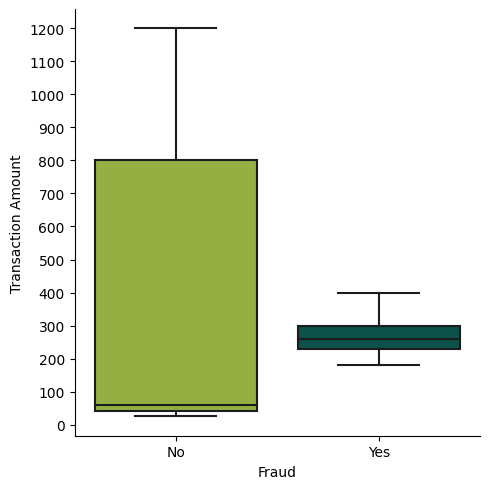

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
custom_palette = {"No": "#9FC131" , "Yes": "#005C53" }

g=sns.catplot(y="Transaction Amount",x="Fraud",data=df,kind="box", palette=custom_palette)
new_y_ticks = [0,100, 200,300,400,500,600,700,800,
               900,1000,1100,1200]  # Adjust the values as needed
plt.yticks(new_y_ticks)
plt.show()

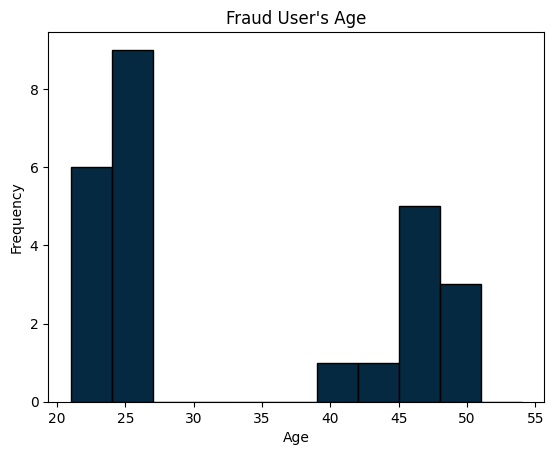

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

veri = df["User's Age"]

condition = df["Fraud"] == "Yes"

filtered_data = df[condition]

plt.hist(filtered_data["User's Age"], bins=range(min(veri), max(veri) + 2, 3), color= "#042940", edgecolor='black')

plt.title("Fraud User's Age")
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

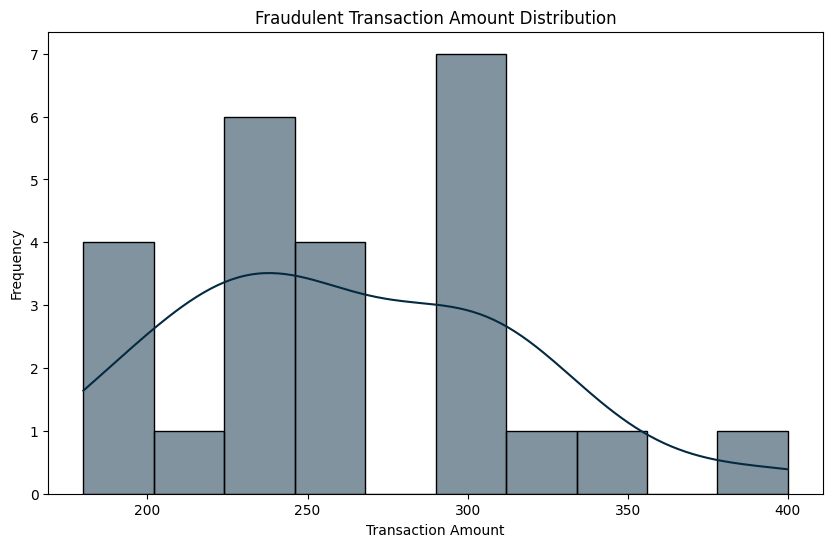

In [85]:
fraud_transactions = df[df['Fraud'] == 'Yes']

plt.figure(figsize=(10, 6))
sns.histplot(fraud_transactions['Transaction Amount'], bins=10, kde=True, color='#042940')
plt.title('Fraudulent Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

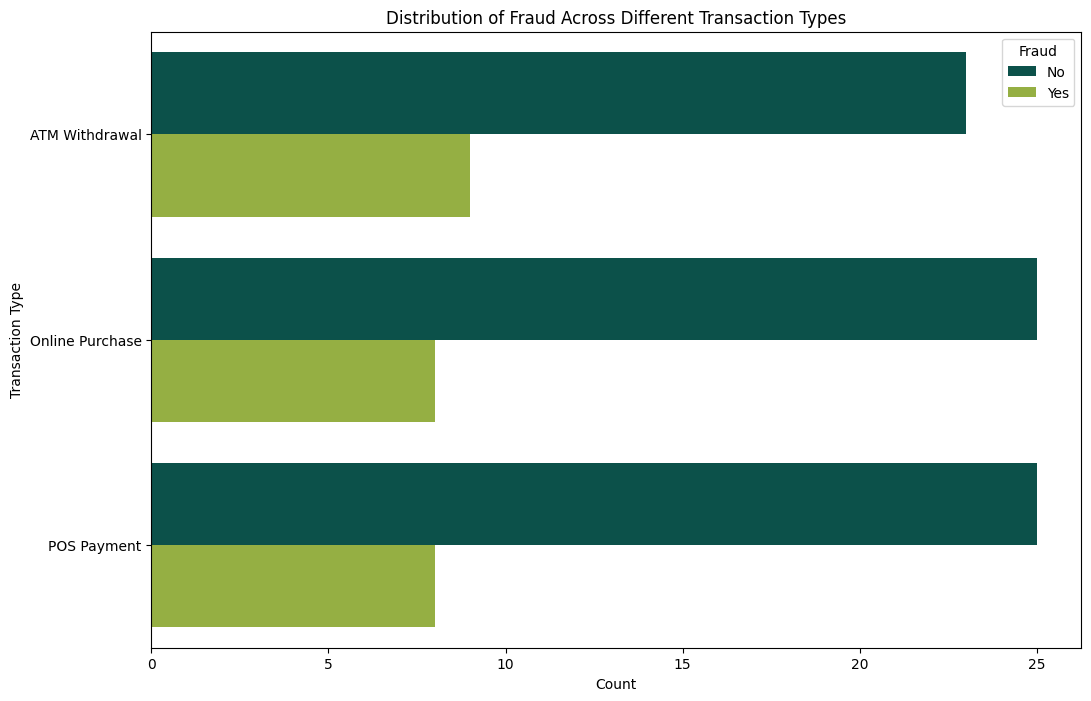

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each combination of Transaction Type and Fraud
fraud_distribution = df.groupby(['Transaction Type', 'Fraud']).size().reset_index(name='Count')

# Define custom colors for 'No' and 'Yes'
colors = {'No': '#005C53', 'Yes': '#9FC131'}

# Create a horizontal bar plot with custom colors
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Transaction Type', hue='Fraud', data=fraud_distribution, palette=colors)
plt.title('Distribution of Fraud Across Different Transaction Types')
plt.xlabel('Count')
plt.ylabel('Transaction Type')
plt.show()


In [87]:
missing_values=["n/a","NA","na","-"]
#df=pd.read_excel("Fraud-Detection.xlsx",na_values=missing_values) na_values=missing_values is applied all columns in the DataFrame,not spesific columns.
df["Location"] = df["Location"].replace(missing_values, pd.NA)
df["Location"].isnull().sum()

mode=df["Location"].mode()[0]#We can imput the mode to the na value.
print(mode)#.Actually the mode doesn't make sense because all frequencies of the location are almost equal.
df["Location"].fillna(mode,inplace=True)

df['Location'] = df['Location'].replace({'"SAN FRANCISCO"': 'SAN FRANCISCO'})
df['Location'] = df['Location'].replace({'"CHICAGO"': 'CHICAGO'})

df['Location'] = df['Location'].str.replace('["]', '').str.strip().str.upper()
df['Location'] = df['Location'].replace({'NEWYORK': 'NEW YORK'})
print(df["Location"].value_counts())

LOS ANGELES
LOS ANGELES      26
NEW YORK         25
CHICAGO          24
SAN FRANCISCO    23
Name: Location, dtype: int64


<ipython-input-87-6a6b57000819>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Location'] = df['Location'].str.replace('["]', '').str.strip().str.upper()


In [ ]:
grouped_data = df[df['Fraud'] == 'Yes'].groupby(['Year', 'Location']).size().unstack().fillna(0)

# Renk kodları
colors = {'CHICAGO': '#042940', 'SAN FRANCISCO': '#005C53', 'NEW YORK': '#9FC131', 'LOS ANGELES': '#DBF227'}

# Plot
locations = grouped_data.columns
years = grouped_data.index

bottom = None
for i, location in enumerate(locations):
    plt.bar(years, grouped_data[location], bottom=bottom, color=colors[location], label=location)
    if bottom is None:
        bottom = grouped_data[location]
    else:
        bottom += grouped_data[location]

plt.xlabel("Years")
plt.ylabel("Fraud Counts")
plt.xticks(years)  # Y ekseninde tüm yılları göster
plt.legend(title='Location')
plt.title("CITY-WISE FRAUD FREQUENCY OVER THE YEARS")
plt.show()